# HR Attrition Data Analysis with Python

## Import and Read Data

In [1]:
# Install Pandas
!pip install pandas

In [2]:
# Upload pandas packages(librairy)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

In [4]:
# Import Excel file with pandas packages
df=pd.read_excel("HR DATA_Excel.xlsx")
df

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


### Data Understanding
- Get the Data Type
- Returns the dimensions(rows, columns) of the Dataframe
- Returm the first 10 rows of the Dataframe
- Return the last 10 of the Dataframe
- Returns the column labels of the Dataframe
- Returns the data types of each column
- Checks for missing values in the DataFrame for each column
- Returns summary statistics of numerical columns(Quantitative Variables)

In [7]:
# Data Type
type(df)

pandas.core.frame.DataFrame

In [9]:
# Returns the dimensions(rows, columns) of the Dataframe
df.shape

(1470, 44)

In [11]:
# Returm the first 10 rows of the dataframe
df.head(10)

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
5,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-8,8,Male,Laboratory Technician,...,3,3,80,0,8,2,7,7,3,6
6,No,Travel_Rarely,Over 55,Current Employees,R&D,Medical,STAFF-10,10,Female,Laboratory Technician,...,4,1,80,3,12,2,1,0,0,0
7,No,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-11,11,Male,Laboratory Technician,...,4,2,80,1,1,3,1,0,0,0
8,No,Travel_Frequently,35 - 44,Current Employees,R&D,Life Sciences,STAFF-12,12,Male,Manufacturing Director,...,4,2,80,0,10,3,9,7,1,8
9,No,Travel_Rarely,35 - 44,Current Employees,R&D,Medical,STAFF-13,13,Male,Healthcare Representative,...,3,2,80,2,17,2,7,7,7,7


In [13]:
# Returm the last 10 rows of the dataframe
df.tail(10)

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
1460,Yes,Travel_Rarely,45 - 54,Ex-Employees,Sales,Life Sciences,STAFF-1869,1869,Female,Sales Executive,...,4,3,80,3,14,3,8,7,0,7
1461,Yes,Travel_Frequently,45 - 54,Ex-Employees,R&D,Life Sciences,STAFF-1420,1420,Male,Laboratory Technician,...,4,1,80,0,20,3,4,3,1,3
1462,Yes,Non-Travel,35 - 44,Ex-Employees,R&D,Life Sciences,STAFF-1458,1458,Female,Laboratory Technician,...,4,2,80,0,11,4,1,0,0,0
1463,Yes,Travel_Rarely,25 - 34,Ex-Employees,Sales,Medical,STAFF-1489,1489,Female,Sales Executive,...,4,3,80,0,16,4,15,9,10,10
1464,Yes,Travel_Rarely,25 - 34,Ex-Employees,Sales,Life Sciences,STAFF-1758,1758,Female,Sales Executive,...,4,3,80,0,11,2,0,0,0,0
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0
1469,Yes,Travel_Rarely,Under 25,Ex-Employees,Sales,Life Sciences,STAFF-1702,1702,Male,Sales Representative,...,4,2,80,1,3,3,3,2,0,2


In [15]:
# Returns the column labels of the Dataframe
df.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', '-2', '0', 'Age', 'CF_attrition count',
       'CF_attrition counts', 'CF_attrition rate', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [17]:
# Returns the data types of each column
df.dtypes

Attrition                      object
Business Travel                object
CF_age band                    object
CF_attrition label             object
Department                     object
Education Field                object
emp no                         object
Employee Number                 int64
Gender                         object
Job Role                       object
Marital Status                 object
Over Time                      object
Over18                         object
Training Times Last Year        int64
-2                              int64
0                               int64
Age                             int64
CF_attrition count              int64
CF_attrition counts           float64
CF_attrition rate               int64
CF_current Employee             int64
Daily Rate                      int64
Distance From Home              int64
Education                      object
Employee Count                  int64
Environment Satisfaction        int64
Hourly Rate 

In [19]:
# Checks for missing values in the DataFrame for each column
df.isnull().sum()

Attrition                        0
Business Travel                  0
CF_age band                      0
CF_attrition label               0
Department                       0
Education Field                  0
emp no                           0
Employee Number                  0
Gender                           0
Job Role                         0
Marital Status                   0
Over Time                        0
Over18                           0
Training Times Last Year         0
-2                               0
0                                0
Age                              0
CF_attrition count               0
CF_attrition counts           1233
CF_attrition rate                0
CF_current Employee              0
Daily Rate                       0
Distance From Home               0
Education                        0
Employee Count                   0
Environment Satisfaction         0
Hourly Rate                      0
Job Involvement                  0
Job Level           

In [21]:
# Returns summary statistics of numerical columns(Quantitative Variables)
df.describe()

,Employee Number,Training Times Last Year,-2,0,Age,CF_attrition count,CF_attrition counts,CF_attrition rate,CF_current Employee,Daily Rate,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.0,1470.0,1470.000000,1470.000000,237.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,-2.0,0.0,36.923810,0.161224,1.0,0.161224,0.838776,802.485714,...,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,0.0,0.0,9.135373,0.367863,0.0,0.367863,0.367863,403.509100,...,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,-2.0,0.0,18.000000,0.000000,1.0,0.000000,0.000000,102.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,-2.0,0.0,30.000000,0.000000,1.0,0.000000,1.000000,465.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,-2.0,0.0,36.000000,0.000000,1.0,0.000000,1.000000,802.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,-2.0,0.0,43.000000,0.000000,1.0,0.000000,1.000000,1157.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,-2.0,0.0,60.000000,1.000000,1.0,1.000000,1.000000,1499.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Data Preparation
- Dropping irrelevant columns and rows
- Identifying dupplicated rows
- Renaming columns and rows
- Feature Creation

In [23]:
# delete or drop specified columns from the DataFrame
df = df.drop(["Over18","emp no","Distance From Home","Daily Rate","-2","0","Employee Count","Hourly Rate","Job Involvement","Job Level","Job Satisfaction",
              "Monthly Rate","Num Companies Worked","Percent Salary Hike","Performance Rating","Relationship Satisfaction","Standard Hours",
              "Stock Option Level","Work Life Balance","Years In Current Role","Years Since Last Promotion","Years With Curr Manager"], axis=1)
df

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,Employee Number,Gender,Job Role,Marital Status,...,Age,CF_attrition count,CF_attrition counts,CF_attrition rate,CF_current Employee,Education,Environment Satisfaction,Monthly Income,Total Working Years,Years At Company
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,1,Female,Sales Executive,Single,...,41,1,1.0,1,0,Associates Degree,2,5993,8,6
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,2,Male,Research Scientist,Married,...,49,0,NaN,0,1,High School,3,5130,10,10
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,4,Male,Laboratory Technician,Single,...,37,1,1.0,1,0,Associates Degree,4,2090,7,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,5,Female,Research Scientist,Married,...,33,0,NaN,0,1,Master's Degree,4,2909,8,8
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,7,Male,Laboratory Technician,Married,...,27,0,NaN,0,1,High School,1,3468,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,1905,Male,Research Scientist,Married,...,34,1,1.0,1,0,Master's Degree,4,2307,5,5
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,1868,Male,Research Scientist,Single,...,29,1,1.0,1,0,Associates Degree,4,2439,1,1
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,1667,Male,Sales Executive,Single,...,35,1,1.0,1,0,Master's Degree,4,4581,13,11
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,1878,Male,Research Scientist,Single,...,22,1,1.0,1,0,High School,4,2472,1,1


In [25]:
# delete or drop specified columns from the DataFrame
df = df.drop(["CF_attrition counts"], axis=1)        
df

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,Employee Number,Gender,Job Role,Marital Status,...,Training Times Last Year,Age,CF_attrition count,CF_attrition rate,CF_current Employee,Education,Environment Satisfaction,Monthly Income,Total Working Years,Years At Company
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,1,Female,Sales Executive,Single,...,0,41,1,1,0,Associates Degree,2,5993,8,6
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,2,Male,Research Scientist,Married,...,3,49,0,0,1,High School,3,5130,10,10
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,4,Male,Laboratory Technician,Single,...,3,37,1,1,0,Associates Degree,4,2090,7,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,5,Female,Research Scientist,Married,...,3,33,0,0,1,Master's Degree,4,2909,8,8
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,7,Male,Laboratory Technician,Married,...,3,27,0,0,1,High School,1,3468,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,1905,Male,Research Scientist,Married,...,2,34,1,1,0,Master's Degree,4,2307,5,5
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,1868,Male,Research Scientist,Single,...,3,29,1,1,0,Associates Degree,4,2439,1,1
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,1667,Male,Sales Executive,Single,...,2,35,1,1,0,Master's Degree,4,4581,13,11
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,1878,Male,Research Scientist,Single,...,2,22,1,1,0,High School,4,2472,1,1


In [31]:
# Checks for missing values in the DataFrame for each column
df.isnull().sum()

Attrition                   0
Business Travel             0
CF_age band                 0
CF_attrition label          0
Department                  0
Education Field             0
Employee Number             0
Gender                      0
Job Role                    0
Marital Status              0
Over Time                   0
Training Times Last Year    0
Age                         0
CF_attrition count          0
CF_attrition rate           0
CF_current Employee         0
Education                   0
Environment Satisfaction    0
Monthly Income              0
Total Working Years         0
Years At Company            0
dtype: int64

In [33]:
# Returns the data types of each column
df.dtypes

Attrition                   object
Business Travel             object
CF_age band                 object
CF_attrition label          object
Department                  object
Education Field             object
Employee Number              int64
Gender                      object
Job Role                    object
Marital Status              object
Over Time                   object
Training Times Last Year     int64
Age                          int64
CF_attrition count           int64
CF_attrition rate            int64
CF_current Employee          int64
Education                   object
Environment Satisfaction     int64
Monthly Income               int64
Total Working Years          int64
Years At Company             int64
dtype: object

In [35]:
# Identifying duplicated rows
df.drop_duplicates(inplace=True,keep="first")
df

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,Employee Number,Gender,Job Role,Marital Status,...,Training Times Last Year,Age,CF_attrition count,CF_attrition rate,CF_current Employee,Education,Environment Satisfaction,Monthly Income,Total Working Years,Years At Company
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,1,Female,Sales Executive,Single,...,0,41,1,1,0,Associates Degree,2,5993,8,6
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,2,Male,Research Scientist,Married,...,3,49,0,0,1,High School,3,5130,10,10
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,4,Male,Laboratory Technician,Single,...,3,37,1,1,0,Associates Degree,4,2090,7,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,5,Female,Research Scientist,Married,...,3,33,0,0,1,Master's Degree,4,2909,8,8
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,7,Male,Laboratory Technician,Married,...,3,27,0,0,1,High School,1,3468,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,1905,Male,Research Scientist,Married,...,2,34,1,1,0,Master's Degree,4,2307,5,5
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,1868,Male,Research Scientist,Single,...,3,29,1,1,0,Associates Degree,4,2439,1,1
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,1667,Male,Sales Executive,Single,...,2,35,1,1,0,Master's Degree,4,4581,13,11
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,1878,Male,Research Scientist,Single,...,2,22,1,1,0,High School,4,2472,1,1


In [39]:
# Display distinct value for each columns
df.nunique()

Attrition                      2
Business Travel                3
CF_age band                    5
CF_attrition label             2
Department                     3
Education Field                6
Employee Number             1470
Gender                         2
Job Role                       9
Marital Status                 3
Over Time                      2
Training Times Last Year       7
Age                           43
CF_attrition count             2
CF_attrition rate              2
CF_current Employee            2
Education                      5
Environment Satisfaction       4
Monthly Income              1349
Total Working Years           40
Years At Company              37
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Business Travel           1470 non-null   object
 2   CF_age band               1470 non-null   object
 3   CF_attrition label        1470 non-null   object
 4   Department                1470 non-null   object
 5   Education Field           1470 non-null   object
 6   Employee Number           1470 non-null   int64 
 7   Gender                    1470 non-null   object
 8   Job Role                  1470 non-null   object
 9   Marital Status            1470 non-null   object
 10  Over Time                 1470 non-null   object
 11  Training Times Last Year  1470 non-null   int64 
 12  Age                       1470 non-null   int64 
 13  CF_attrition count        1470 non-null   int64 
 14  CF_attrition rate       

In [45]:
df.describe()

,Employee Number,Training Times Last Year,Age,CF_attrition count,CF_attrition rate,CF_current Employee,Environment Satisfaction,Monthly Income,Total Working Years,Years At Company
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,36.923810,0.161224,0.161224,0.838776,2.810204,6502.931293,11.279592,7.008163
std,602.024335,1.289271,9.135373,0.367863,0.367863,0.367863,1.103879,4707.956783,7.780782,6.126525
min,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1009.000000,0.000000,0.000000
25%,491.250000,2.000000,30.000000,0.000000,0.000000,1.000000,2.000000,2911.000000,6.000000,3.000000
50%,1020.500000,3.000000,36.000000,0.000000,0.000000,1.000000,3.000000,4919.000000,10.000000,5.000000
75%,1555.750000,3.000000,43.000000,0.000000,0.000000,1.000000,4.000000,8379.000000,15.000000,9.000000
max,2068.000000,6.000000,60.000000,1.000000,1.000000,1.000000,4.000000,19999.000000,40.000000,40.000000


### Data Exploratory Analysis


- What is a categorical variable?
In statistics, a categorical variable is a type of variable that only has a limited number of values. 
In other words, a categorical variable has a finite number of possible values.

In [47]:
import ipywidgets as widgets
print(widgets.__version__)

8.0.0b0


In [49]:
# Display all categorical variables inferior to 5 distincts values
categorical_columns=df.nunique()[df.nunique()<=6].keys().to_list()
categorical_columns

['Attrition',
 'Business Travel',
 'CF_age band',
 'CF_attrition label',
 'Department',
 'Education Field',
 'Gender',
 'Marital Status',
 'Over Time',
 'CF_attrition count',
 'CF_attrition rate',
 'CF_current Employee',
 'Education',
 'Environment Satisfaction']

In [51]:
def bar_plot(a):
    df[a].value_counts(normalize = False).plot(kind ='bar')
    plt.ylabel('proportion')
    plt.title('Distribution of '+ str(a))
    return plt.show()

In [53]:
# Interact
interact(bar_plot, a = categorical_columns);

interactive(children=(Dropdown(description='a', options=('Attrition', 'Business Travel', 'CF_age band', 'CF_at…

### Display Quantitatives variables

In [55]:
numerical_columns=['Age','Monthly Income','Total Working Years','Years At Company']
def bar_plot(b):
    sns.displot(df[b],kde=False)
    plt.ylabel('proportion')
    plt.title('Histogram of '+ str(b))
    return plt.show()

In [57]:
interact(bar_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('Age', 'Monthly Income', 'Total Working Years', 'Year…

In [66]:
data=df

In [68]:
# Count and display Attrition information with Pie chat
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

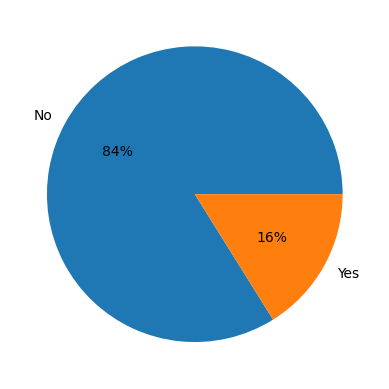

In [70]:
# colors = sns.color_palette("husl", 2)
plt.pie(df['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.0f%%')
plt.show()

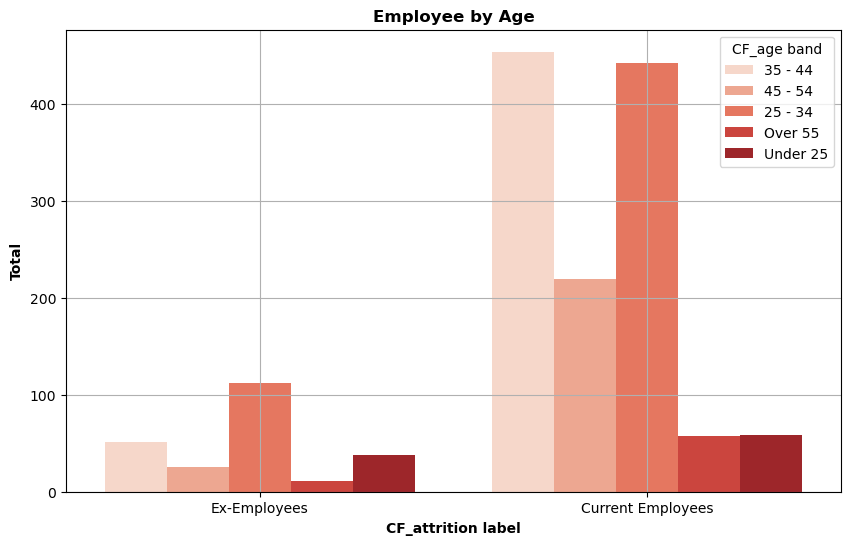

In [72]:
# Histograme display Current and Ex Employee by Age Group
plt.figure(figsize=(10,6))
sns.countplot(data, x="CF_attrition label", hue="CF_age band", palette="Reds")
plt.title("Employee by Age", color="Black", weight="bold")
plt.xlabel("CF_attrition label", weight="bold")
plt.ylabel("Total", weight="bold")
plt.grid()
plt.show()

In [74]:
# Count and display Department information with Pie chat
dept_dist=df['Department'].value_counts()
dept_dist

Department
R&D      961
Sales    446
HR        63
Name: count, dtype: int64

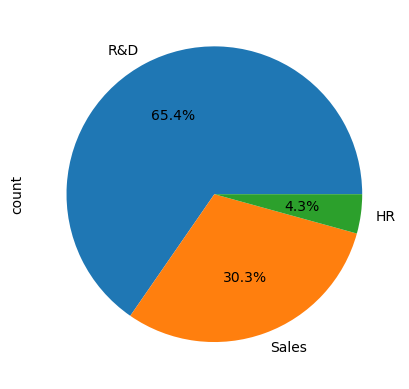

In [76]:
data['Department'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

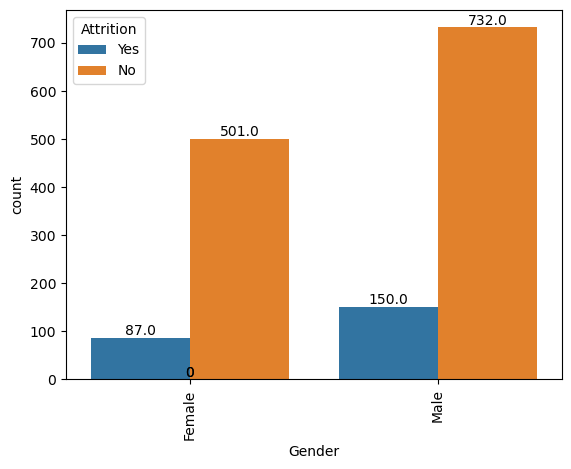

In [80]:
# Display Histogram with Gender by Attrition 
m=sns.countplot(data=df, x='Gender', hue='Attrition')
plt.xticks(rotation=90)
for p in m.patches:
    height = p.get_height()
    m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.show()

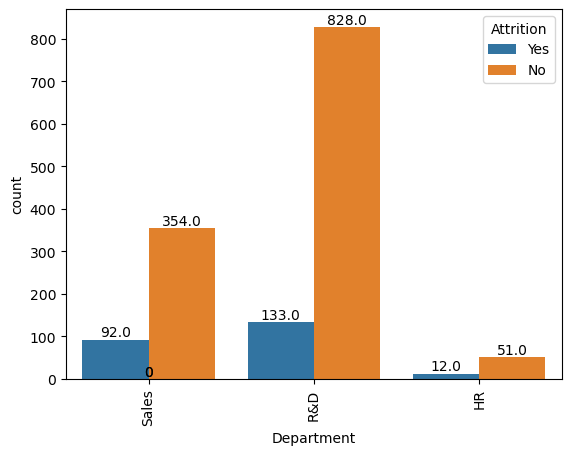

In [82]:
# Display Histogram with Department by Attrition 
m=sns.countplot(data=df, x='Department', hue='Attrition')
plt.xticks(rotation=90)
for p in m.patches:
    height = p.get_height()
    m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.show()

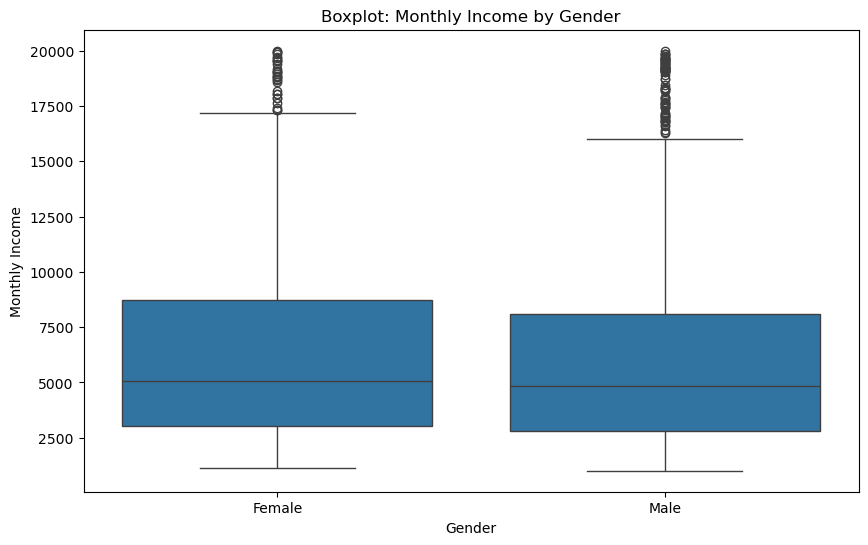

In [84]:
# Dipslay Boxplot Monthly Income By Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Monthly Income', data=df)
plt.title('Boxplot: Monthly Income by Gender')
plt.show()

In [86]:
# Diplay pivot table Environment Satisfaction by marial Status
df.pivot_table(index='Marital Status',columns='Environment Satisfaction',values='Employee Number',aggfunc='count')


Environment Satisfaction,1,2,3,4
Marital Status,,,,
Divorced,58,56,92,121
Married,116,132,206,219
Single,90,81,121,178


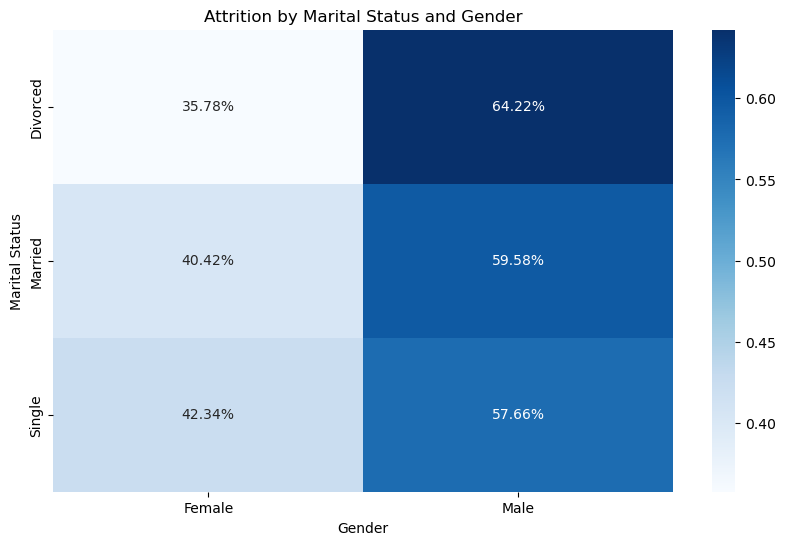

In [88]:
# Display Attition by Marial Status and Gender
cross_tab = pd.crosstab(df['Marital Status'], df['Gender'], values=df['Attrition'], aggfunc='count', normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt=".2%", cbar=True)
plt.title('Attrition by Marital Status and Gender')
plt.show()

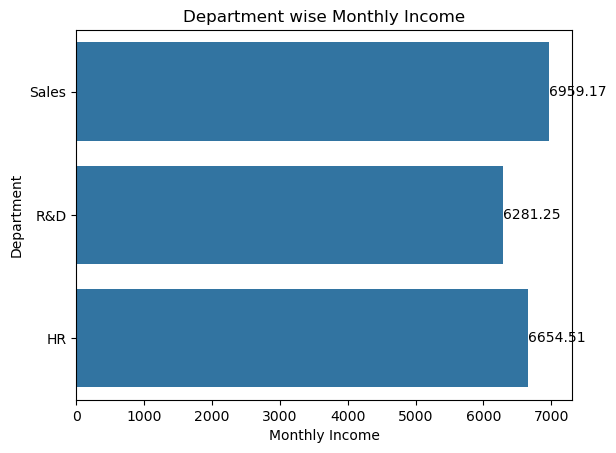

In [90]:
# Display Monthly Income for  Department wise 
p=sns.barplot(data=df, y='Department', x='Monthly Income',errorbar=None)
p.bar_label(p.containers[0], fontsize=10)
plt.title('Department wise Monthly Income')
plt.show()

In [92]:
# Dipslay Department By Employee that left they job
df1= df[df['Attrition']=="Yes"]
att_cnt=df1['Department'].value_counts()
att_cnt

Department
R&D      133
Sales     92
HR        12
Name: count, dtype: int64

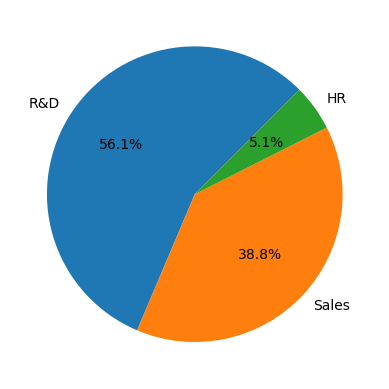

In [94]:
plt.pie(att_cnt, labels=att_cnt.index,autopct='%1.1f%%', startangle=45)
plt.show()

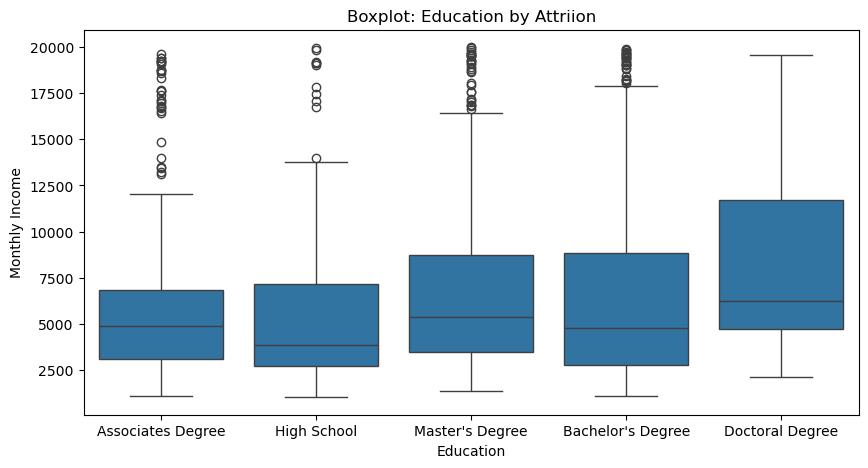

In [102]:
# Dipslay Boxplot Education vs Gender
plt.figure(figsize=(10, 5))
sns.boxplot(x='Education', y='Monthly Income', data=df)
plt.title('Boxplot: Education by Monthly Income')
plt.show()